In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
# define muted color palette
col_pal = sns.color_palette("muted")
sns.set_palette(col_pal)

In [3]:
# load xkcd font
fm.fontManager.addfont('./plot_fonts/xkcd.otf')

In [4]:
def sig_2d(x1, x2, w1, w2, b):
    """
    Computes the sigmoid function of a two-dimensional input.

    Parameters:
    x1: array-like, shape (n_samples,)
        The first input variable.
    x2: array-like, shape (n_samples,)
        The second input variable.
    w1: float
        The weight for the first input variable.
    w2: float
        The weight for the second input variable.
    b: float
        The bias term.

    Returns:
    y: ndarray, shape (n_samples,)
        The output of the sigmoid function for the given input.
    """
    z = w1 * x1 + w2 * x2 + b
    return 1 / (1 + np.exp(-z))

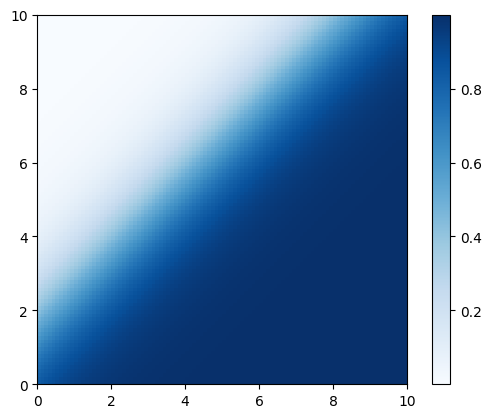

The centre is approx 0.85: 0.85


In [5]:
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(0, 10, 100)
xx1, xx2 = np.meshgrid(x1, x2)

w1 = 1
w2 = 1
b = -8.35
Y = sig_2d(xx1, xx2, w1, w2, b)
plt.imshow(Y, cmap='Blues', extent=[0, 10, 0, 10])
plt.colorbar()
plt.show()

print('The centre is approx 0.85: {:.2f}'.format(Y[50,50]))

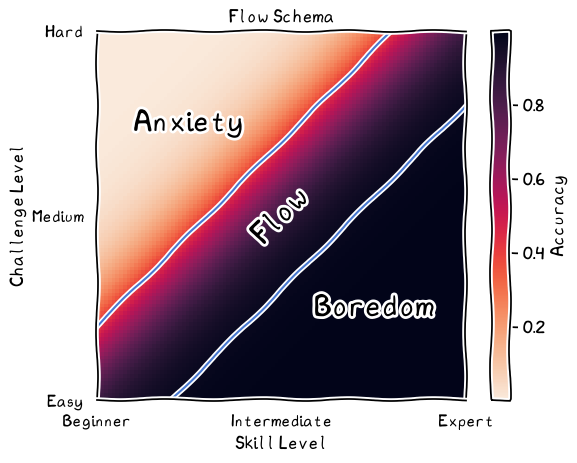

In [21]:
with plt.xkcd():
    sns.set_theme(rc={
        'axes.facecolor':'#282828',
        'figure.facecolor':'#282828',
        'axes.edgecolor':'black',
        'axes.grid':False,
        'font.family':'xkcd',
        'font.size':12
    })

    fig, ax = plt.subplots(frameon=False)
    
    x = np.linspace(-10, 20, 100)
    y = x - 2
    y2 = x + 2
    plt.plot(x, y, color=col_pal[0])
    plt.plot(x, y2, color=col_pal[0])

    im = ax.imshow(Y, cmap='rocket_r', extent=[0, 10, 0, 10])
    fig.colorbar(im, ax=ax, label='Accuracy')

    plt.ylim(0, 10)
    plt.xlim(0, 10)
    plt.xticks([0, 5, 10], ['Beginner', 'Intermediate', 'Expert'])
    plt.yticks([0, 5, 10], ['Easy', 'Medium', 'Hard'])

    # add text to represent the states
    plt.text(5, 5, 'Flow',
                rotation=45, 
                fontsize=20, 
                color='black', 
                ha='center', 
                va='center',
                axes=ax)
    
    plt.text(2.5, 7.5, 'Anxiety',
                fontsize=20,
                color='black',
                ha='center',
                va='center',
                axes=ax)
    
    plt.text(7.5, 2.5, 'Boredom',
                fontsize=20,
                color='black',
                ha='center',
                va='center',
                axes=ax)
    
    plt.title('Flow Schema')
    plt.xlabel('Skill Level')
    plt.ylabel('Challenge Level')
    plt.show()

fig.subplots_adjust(bottom=0.15) 
fig.savefig('../content/projects/edplace/flow_schema_transparent.png', 
            dpi=300,
            transparent=True,
            pad_inches=0)
